# Importing of Packages and Defining Functions

## Import packages:

In [1]:
# Normal packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# Statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as stats


# Counter
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import sklearn.metrics as metrics


import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Define Functions (from proj 1)

### def check_column

In [0]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series,nlargest='all'):
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series)*100,3)}%")
        
    print(f'\nUnique non-na values:') #,df['waterfront'].unique())
    if nlargest =='all':
        print(series.value_counts())
    else:
        print(series.value_counts().nlargest(nlargest))

### def multiplot

In [0]:
# MULTIPLOT
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def multiplot(df):
    """Plots results from df.corr() in a correlation heat map for multicollinearity.
    Returns fig, ax objects"""
    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 16))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0,
                
    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return f, ax

### def detect_outliers

In [0]:
# Tukey's method using IQR to eliminate 
def detect_outliers(df, n, features):
    """Uses Tukey's method to return outer of interquartile ranges to return indices if outliers in a dataframe.
    Parameters:
    df (DataFrame): DataFrane containing columns of features
    n: default is 0, multiple outlier cutoff  
    
    Returns:
    Index of outliers for .loc
    
    Examples:
    Outliers_to_drop = detect_outliers(data,2,["col1","col2"]) Returning value
    df.loc[Outliers_to_drop] # Show the outliers rows
    data= data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
   """

# Drop outliers    

    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers 


### def plot_hist_scat_sns

In [0]:
# Plots histogram and scatter (vs price) side by side
def plot_hist_scat_sns(df, target='index'):
    """Plots seaborne distplots and regplots for columns im datamframe vs target.

    Parameters:
    df (DataFrame): DataFrame.describe() columns will be used. 
    target = name of column containing target variable.assume first coluumn. 
    
    Returns:
    Figures for each column vs target with 2 subplots.
   """
    import matplotlib.ticker as mtick
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    with plt.style.context(('seaborn-paper')):
        ###  DEFINE AESTHETIC CUSTOMIZATIONS  -------------------------------##


        plt.style.use('dark_background')
        figsize=(10,8)

        # Axis Label fonts
        fontTitle = {'fontsize': 12,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontAxis = {'fontsize': 10,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontTicks = {'fontsize': 8,
                   'fontweight':'bold',
                    'fontfamily':'serif'}

        # Formatting dollar sign labels
        fmtPrice = '${x:,.0f}'
        tickPrice = mtick.StrMethodFormatter(fmtPrice)


        ###  PLOTTING ----------------------------- ------------------------ ##

        # Loop through dataframe to plot
        for column in df.describe():

            # Create figure with subplots for current column
            fig, ax = plt.subplots(figsize=figsize, ncols=2, nrows=2)

            ##  SUBPLOT 1 --------------------------------------------------##
            i,j = 0,0
            ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

            # Define graphing keyword dictionaries for distplot (Subplot 1)
            hist_kws = {"linewidth": 1, "alpha": 1, "color": 'blue','edgecolor':'w'}
            kde_kws = {"color": "white", "linewidth": 1, "label": "KDE"}

            # Plot distplot on ax[i,j] using hist_kws and kde_kws
            sns.distplot(df[column], norm_hist=True, kde=True,
                         hist_kws = hist_kws, kde_kws = kde_kws,
                         label=column+' histogram', ax=ax[i,j])


            # Set x axis label
            ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

            # Get x-ticks, rotate labels, and return
            xticklab1 = ax[i,j].get_xticklabels(which = 'both')
            ax[i,j].set_xticklabels(labels=xticklab1, fontdict=fontTicks, rotation=45)
            ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())


            # Set y-label 
            ax[i,j].set_ylabel('Density',fontdict=fontAxis)
            yticklab1=ax[i,j].get_yticklabels(which='both')
            ax[i,j].set_yticklabels(labels=yticklab1,fontdict=fontTicks)
            ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())


            # Set y-grid
            ax[i, j].set_axisbelow(True)
            ax[i, j].grid(axis='y',ls='--')




            ##  SUBPLOT 2-------------------------------------------------- ##
            i,j = 0,1
            ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

            # Define the kwd dictionaries for scatter and regression line (subplot 2)
            line_kws={"color":"white","alpha":0.5,"lw":4,"ls":":"}
            scatter_kws={'s': 2, 'alpha': 0.5,'marker':'.','color':'blue'}

            # Plot regplot on ax[i,j] using line_kws and scatter_kws
            sns.regplot(df[column], df[target], 
                        line_kws = line_kws,
                        scatter_kws = scatter_kws,
                        ax=ax[i,j])

            # Set x-axis label
            ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

             # Get x ticks, rotate labels, and return
            xticklab2=ax[i,j].get_xticklabels(which='both')
            ax[i,j].set_xticklabels(labels=xticklab2,fontdict=fontTicks, rotation=45)
            ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

            # Set  y-axis label
            ax[i,j].set_ylabel(target,fontdict=fontAxis)

            # Get, set, and format y-axis Price labels
            yticklab = ax[i,j].get_yticklabels()
            ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
            ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())

    #         ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

            # Set y-grid
            ax[i, j].set_axisbelow(True)
            ax[i, j].grid(axis='y',ls='--')       

            ## ---------- Final layout adjustments ----------- ##
            # Deleted unused subplots 
            fig.delaxes(ax[1,1])
            fig.delaxes(ax[1,0])

            # Optimizing spatial layout
            fig.tight_layout()
            figtitle=column+'_dist_regr_plots.png'
            plt.savefig(figtitle)
    return 

## Defining Functions (Proj 2 specific)

### def list2df

In [0]:
def list2df(list):#, sort_values='index'):
    """ Take in a list where row[0] = column_names and outputs a dataframe.
    
    Keyword arguments:
    set_index -- df.set_index(set_index)
    sortby -- df.sorted()
    """    
    
    df_list = pd.DataFrame(list[1:],columns=list[0])
#     df_list = df_list[1:]

    return df_list

### def get_col_info

In [0]:
def  get_col_info(col_name):
    """Gets the column names and data types from the alchamey inspector object.
    Returns column_info dataframe of table details.
    """
    col_list = inspector.get_columns(col_name)
    
    column_info = [['table','column','dtype']]
    print(f'Table Name: {col_name}\n')

    for col in col_list:
        column_info.append([str(col_name),col['name'], col['type']])
        
    df = list2df(column_info)
    return column_info

### def describe_outliers

In [0]:
# describe_outliers -- calls detect_outliers
def describe_outliers(df):
    """ Returns a new_df of outliers, and % outliers each col using detect_outliers.
    """
    out_count = 0
    new_df = pd.DataFrame(columns=['total_outliers', 'percent_total'])
    for col in df.columns:
        outies = detect_outliers(df[col])
        out_count += len(outies) 
        new_df.loc[col] = [len(outies), round((len(outies)/len(df.index))*100, 2)]
    new_df.loc['grand_total'] = [sum(new_df['total_outliers']), sum(new_df['percent_total'])]
    return new_df

### def get_full_table_info

In [0]:
def  get_full_table_info(engine):
    """Gets the table names, their column namesand data types engine.
    Returns column_info dataframe of table details.
    """
    column_info = [['table','column','dtype']]
    
    list_tables= engine.table_names()
    
    for table in list_tables:
        
        col_list = inspector.get_columns(table)
        
        for col in col_list:
            
            column_info.append([str(table),col['name'], col['type'],col['']])
            inspector.get_foreign_keys()
    
    df = list2df(column_info)
    return df

### def Cohen's d 

In [0]:
#### Cohen's d
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    pyplot.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    pyplot.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)
   

### def normtest_results

In [0]:
def normtest_results(dict_data):
    """Peforms both d'agostino-pearson and shapiro-wilik normal tests
        
        Parameters:
            dict_data -- dictionary with {'name' : data} 
        Returns:
            results_normtest -- list of test results (can run list2df(results_normtest)
    """
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import shapiro
    from scipy.stats import normaltest

    results_normtest_shap = [['DataIn','Test','stat','p']]
    results_normtest_dagp = [['DataIn','Test','stat','p']]

    for key,val in dict_data.items():

        data_in = val
        name = key
        test = 'Shapiro'
        stat, p = shapiro(data_in)
        results_normtest_shap.append([name , test, stat , p ])
        test = 'D’Agostino’s'
        stat, p = normaltest(data_in)
        results_normtest_dagp.append([name,test,stat, p])

    results_normtest = pd.concat([list2df(results_normtest_shap), list2df(results_normtest_dagp)]) 

    return results_normtest #, list2df(results_normtest_shap),list2df(results_normtest_dagp)

#   results_pivot = results.pivot(index='DataIn', columns= 'Test')
#   results_pivot.stack(0)

### def quant_transform

In [0]:
# TRANSFORM DATA BEFORE RE-CALLING ORIGINAL normtest_results
def quant_transform(data_in):
    '''Use sklearn.preprocessing.QuantileTransformer to remove outliers from dataset.
    
    Parameters:
        data_in (dict) -- dictionary with data series as values to be processed.
    Returns: 
        data_tf (dict) -- dicionary of same keys from data_in, but transformed.
        '''
    
    from sklearn import preprocessing as prep 
    from sklearn.preprocessing import QuantileTransformer

    qt =  QuantileTransformer(n_quantiles=10,output_distribution='normal')
    data_tf = {}
    for k,v in data_in.items():    
        data = np.array(v).reshape(-1,1)
        transformed = pd.Series(np.squeeze(qt.fit_transform(data)))
      
        data_tf[k] = transformed
    
    return data_tf

# Hypothesis 3
Does the time of year affect quantity of items sold?

 - H0 = The month of an order has no affect on the mean quantity of items sold.

 - HA = THe month an order is placed relates to either a higher or lower mean quantity of items sold.


_________
## ***Aim 1.1 : To select the proper dataset for analyiss  and generate data groups for testing.***

#### Importing Method
- Use sqlalchemy to create engine to connect to Northwind_small.sqlite.
ENTER YOUR SQL HERE


In [13]:

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

filepath = '/content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite'
engine = create_engine('sqlite:///'+filepath,echo=True)
inspector = inspect(engine);

# df_employee = pd.read_sql_query("SELECT Id, Title, LastName, HireDate , BirthDate  FROM [EMPLOYEE]", engine )
# df_cust_ord = pd.read_sql_query("SELECT *FROM [Order] JOIN [Customer] ON [Customer].Id = [Order].CustomerId", engine)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
2019-04-06 20:26:06,345 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-06 20:26:06,349 INFO sqlalchemy.engine.base.Engine ()
2019-04-06 20:26:06,357 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-06 20:26:06,360 INFO sqlalchemy.engine.base.Engine ()


In [14]:
df_ord = pd.read_sql_query("SELECT * FROM OrderDetail JOIN [Order]  ON [Order].Id = OrderDetail.OrderId", engine)
# df_ord = pd.concat([df_ord, df_employee['Title']], axis=1)
df_ord.columns


2019-04-06 20:26:06,378 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail JOIN [Order]  ON [Order].Id = OrderDetail.OrderId
2019-04-06 20:26:06,381 INFO sqlalchemy.engine.base.Engine ()


Index(['Id', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount', 'Id',
       'CustomerId', 'EmployeeId', 'OrderDate', 'RequiredDate', 'ShippedDate',
       'ShipVia', 'Freight', 'ShipName', 'ShipAddress', 'ShipCity',
       'ShipRegion', 'ShipPostalCode', 'ShipCountry'],
      dtype='object')

In [0]:
#Drop wht we dont need
df_ord.drop(['OrderId', 'ShipName', 'ShippedDate', 'RequiredDate', 'ShipVia','ShipAddress',
             'RequiredDate','ShippedDate', 'ShippedDate', 'ShipCity', 'ShipCountry',
            'ShipRegion', 'Freight'],inplace=True, axis=1)


# relabel the Id column so they have unique names
df_ord.columns = ['Id', 'ProductId', 'UnitPrice', 'Quantity', 'Discount', 'OrderId',
       'CustomerId', 'EmployeeId', 'OrderDate', 'ShipPostalCode']

# df_ord['OrderDate'] = pd.to_datetime(df_ord.OrderDate )
# df_ord.OrderDate.sort_values().min(), df_ord.OrderDate.sort_values().max()

### Engineering price features for our hypothesis

##### def calc_product_price & cal_order_total

In [0]:
#from James
def calc_product_price(row):
    price = row['UnitPrice']*(1-row['Discount'])*row['Quantity']
    row['price'] = price
    if row['Discount']>0:
        row['OnSale'] = True
    else:
        row['OnSale'] = False
    return row    

# Use calc_order_total to fill in order_total column
def calc_order_total(row,df):
    order = row['OrderId']
    df_temp = df.groupby('OrderId').get_group(order)

    
    if any(df_temp['OnSale']):
        row['discounted_order'] = True
    else:
        row['discounted_order'] = False
    
    order_total = df_temp['price'].sum()
    row['order_total'] = order_total
    
    return row

##### make new df with new features

In [17]:
#Apply calc_product_price to every row 

df_price = df_ord.apply(lambda x: calc_product_price(x),axis=1)

# Apply_calc_order_total to every row

df_price = df_price.apply(lambda x: calc_order_total(x,df_price), axis=1)  
df_price.describe()

,ProductId,UnitPrice,Quantity,Discount,OrderId,EmployeeId,price,order_total
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,40.793039,26.218520,23.812993,0.056167,10659.375870,4.333179,587.374960,1854.402873
std,22.159019,29.827418,19.022047,0.083450,241.378032,2.490351,969.224235,1961.203326
min,1.000000,2.000000,1.000000,0.000000,10248.000000,1.000000,4.800000,12.500000
25%,22.000000,12.000000,10.000000,0.000000,10451.000000,2.000000,147.000000,634.200000
50%,41.000000,18.400000,20.000000,0.000000,10657.000000,4.000000,337.750000,1336.950000
75%,60.000000,32.000000,30.000000,0.100000,10862.500000,7.000000,656.000000,2222.300000
max,77.000000,263.500000,130.000000,0.250000,11077.000000,9.000000,15810.000000,16387.500000


#### Adding datetime columns for day of week and month

In [18]:
#convert dates to datetime
df_price['OrderDate'] = pd.to_datetime(df_price.OrderDate )
df_price.OrderDate.sort_values().min(), df_price.OrderDate.sort_values().max()# seeing date range

(Timestamp('2012-07-04 00:00:00'), Timestamp('2014-05-06 00:00:00'))

In [0]:
# concat two dfs
# df_price = pd.concat([df_price, df_ord[['OrderDate']]], axis=1) #, 'EmployeeId', 'employee_title

In [20]:
# create columns for day of week and month
df_price['OrderDate'] = pd.to_datetime(df_price.OrderDate) 

df_price['week_day'] = df_price['OrderDate'].dt.dayofweek
df_price['month'] = df_price['OrderDate'].dt.month

df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 16 columns):
Id                  2155 non-null object
ProductId           2155 non-null int64
UnitPrice           2155 non-null float64
Quantity            2155 non-null int64
Discount            2155 non-null float64
OrderId             2155 non-null int64
CustomerId          2155 non-null object
EmployeeId          2155 non-null int64
OrderDate           2155 non-null datetime64[ns]
ShipPostalCode      2100 non-null object
price               2155 non-null float64
OnSale              2155 non-null bool
discounted_order    2155 non-null bool
order_total         2155 non-null float64
week_day            2155 non-null int64
month               2155 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 240.0+ KB


In [21]:
criteria = df_price['month'] <= 6 # boolean selector used to select parts of df for possible plotting options

#drop duplicate orders based on OrderId to not inflate or deflate order_total mean
# split in two for exploring subsets
df_month6 = df_price.loc[criteria,['month','order_total','Discount','OrderId']].drop_duplicates(['OrderId'])
df_month12 = df_price.loc[~criteria,['month','order_total','Discount','OrderId']].drop_duplicates(['OrderId'])

#Did use this variable
total_order = pd.concat([df_month6['order_total'], df_month12['order_total']],axis=0)
len(total_order) == len(df_month6['order_total'])+len(df_month12['order_total']) # verifying correct lengths

True

####Subset our final working dataframe for further testing

In [22]:
df_year = df_price.loc[:,['month', 'order_total', 'Discount', 'OrderId']].drop_duplicates(['OrderId'])
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 2130
Data columns (total 4 columns):
month          830 non-null int64
order_total    830 non-null float64
Discount       830 non-null float64
OrderId        830 non-null int64
dtypes: float64(2), int64(2)
memory usage: 32.4 KB


#### Create a dictionary containing keys and values representing months to assist in plotting and testing

In [23]:
#make list of month names (strings)
months = ['jan','feb', 'mar', 'apr', 'may' , 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']#creating label names
#make corresponding list of integers from 1 = 'jan' through 12 = 'dec'
month_code = list(range(1,len(months)+1))
month_dict = dict(zip(month_code,months)) # zip the two into a dictionary
month_dict.items()

dict_items([(1, 'jan'), (2, 'feb'), (3, 'mar'), (4, 'apr'), (5, 'may'), (6, 'jun'), (7, 'jul'), (8, 'aug'), (9, 'sep'), (10, 'oct'), (11, 'nov'), (12, 'dec')])

####Finally ad one more columns, month_name

In [24]:
for k,v in month_dict.items():
  df_year.loc[(df_year['month'] == k), 'month_name'] = v 
df_year.head(), df_year.tail()

(    month  order_total  Discount  OrderId month_name
 0       7       440.00      0.00    10248        jul
 3       7      1863.40      0.00    10249        jul
 5       7      1552.60      0.00    10250        jul
 8       7       654.06      0.05    10251        jul
 11      7      3597.90      0.05    10252        jul,
       month  order_total  Discount  OrderId month_name
 2121      5     300.0000      0.00    11073        may
 2123      5     232.0850      0.05    11074        may
 2124      5     498.1000      0.15    11075        may
 2127      5     792.7500      0.25    11076        may
 2130      5    1255.7205      0.20    11077        may)

### EDA
 - define uselful functions for visualizations
 - Plotting and visualizing features

#### Define plotting functions for looking at each month individually 


##### def make_violinplot

In [0]:
# plotting order totals per month in violin plots

def make_violinplot(x,y, title=None, hue=None, ticklabels=None):
  
  '''Plots a violin plot with horizontal mean line, inner stick lines'''
  
  plt.style.use('dark_background')
  fig,ax =plt.subplots(figsize=(12,10))


  sns.violinplot(x, y,cut=2,split=True, scale='count', scale_hue=True,
                 saturation=.5, alpha=.9,bw=.25, palette='Dark2',inner='stick', hue=hue).set_title(title)

  ax.axhline(y.mean(),label='total mean', ls=':', alpha=.5, color='xkcd:yellow')
  ax.set_xticklabels(ticklabels)

  plt.legend()
  plt.show()
  x= df_year['month']
  y= df_year['order_total']
  title = 'Order totals per month with or without discounts'
  hue=df_year['Discount']>0

##### def make-stripplot

In [0]:
def make_stripplot(x, y, title=None, hue=None, ticklabels=None):

  plt.style.use('dark_background')
  fig,ax =plt.subplots(figsize=(8,6))


  sns.stripplot(x, y, jitter=True, size=12,edgecolor='gray',linewidth=1.5, alpha=.5, palette='Dark2',marker='d', hue=hue).set_title(title)

  ax.axhline(y.mean(),label='total mean', ls=':', alpha=.5, color='xkcd:yellow')
  ax.set_xticklabels(ticklabels)

  plt.legend()
  plt.show()


##### def draw_histograms

In [0]:
plt.style.use('default')
def draw_histograms(df, variable, sample_dict, n_rows, n_cols):

  '''Takes dataframe, variable is column name , plots histograms '''
  
  with plt.style.context('seaborn-paper'):

    fig = plt.figure(figsize=(10,10))

    for k,v in sample_dict.items():

      month = df[df[variable] == k]['order_total']
      month_mean = round(np.mean(month),2)

      year =  df[df['month'] != k]['order_total']
      year_mean = round(np.mean(year),2)

      ax = fig.add_subplot(n_rows,n_cols,k)
      ax.tick_params(labelsize=8)

      plt.hist(year, bins=90,alpha=.7, label='Rest of Year')
      plt.hist(month, alpha=.6,label= v.title())

      ax.set_title(v.title(),fontsize=14)

      plt.axvline(month_mean, color='xkcd:fuchsia',linestyle='--',
                  label='Sample Mean \n'+str(month_mean))

      plt.axvline(year_mean,color='xkcd:green',linestyle='-',
                  label='Pop. Mean \n'+str(year_mean))

      plt.legend(fontsize=6, frameon=False, ncol = 2 )

    fig.tight_layout()    
    plt.show()

##### def draw_histograms_sample 

In [0]:
def draw_histograms_from_sample(population,sample_dict, n_rows, n_cols):

  fig = plt.figure(figsize=(8.5,7.5))
  count = 0
  
  for k,v in sample_dict.items():
    
    count += 1                        

    month = sample_dict[k] #pop_samp_month_dict[k]
    month_mean = round(np.mean(v),2)
    
    year = population
    year_mean = round(np.mean(population),2)

    ax = fig.add_subplot(n_rows,n_cols, count)
    ax.tick_params(labelsize=8)

    plt.hist(year, alpha=.8, label='All Months')
    plt.hist(month, alpha=.6, label = k.title())

    ax.set_title(k.title(),fontsize=14)

    plt.axvline(month_mean, color='xkcd:fuchsia',linestyle='--',
                label='Sample Mean \n'+str(month_mean))
    plt.axvline(year_mean,color='xkcd:green',linestyle='-',
                label='Pop. Mean \n'+str(year_mean))
    
    plt.legend(fontsize=6, frameon=False)
    
  fig.tight_layout()    
  plt.show()

#### plot initial order totals by month

In [0]:
#declare variables to be plotted

x = df_year['month']
y = df_year['order_total']
ticks = [v for v in month_dict.values()] 
title = 'Order totals per month with or without discounts'
hue = df_year['Discount']>0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


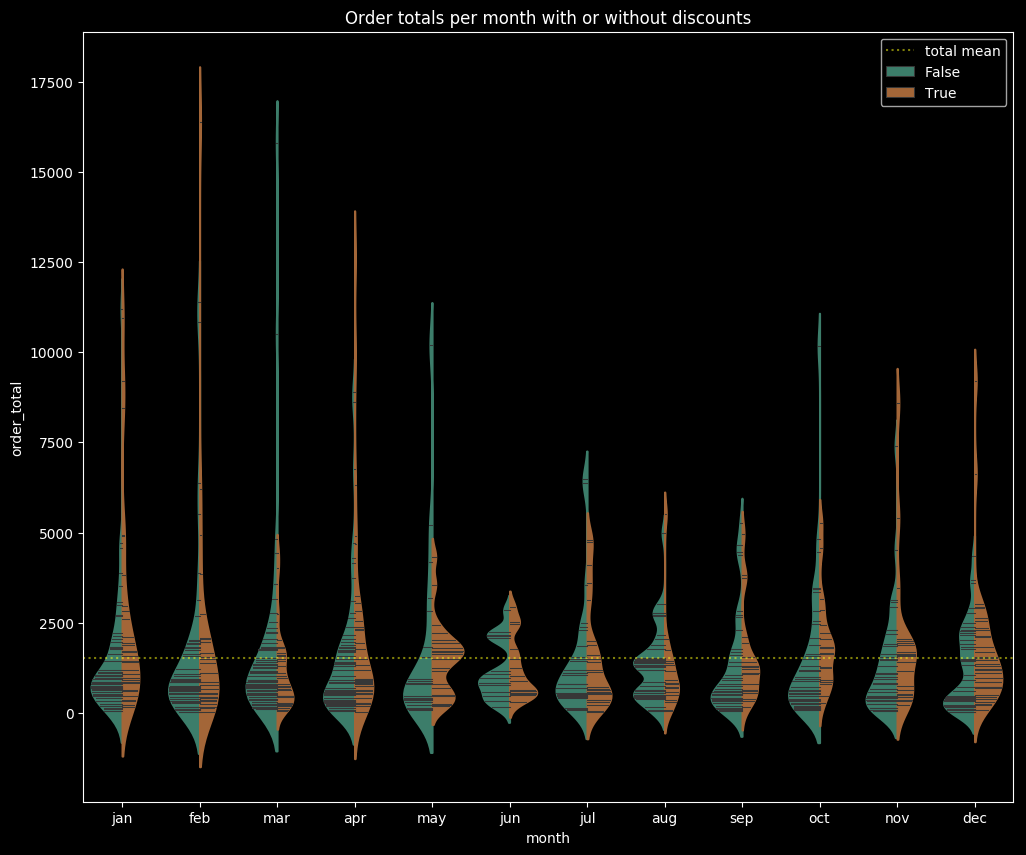

In [30]:
make_violinplot(x,y,title,hue, ticks)

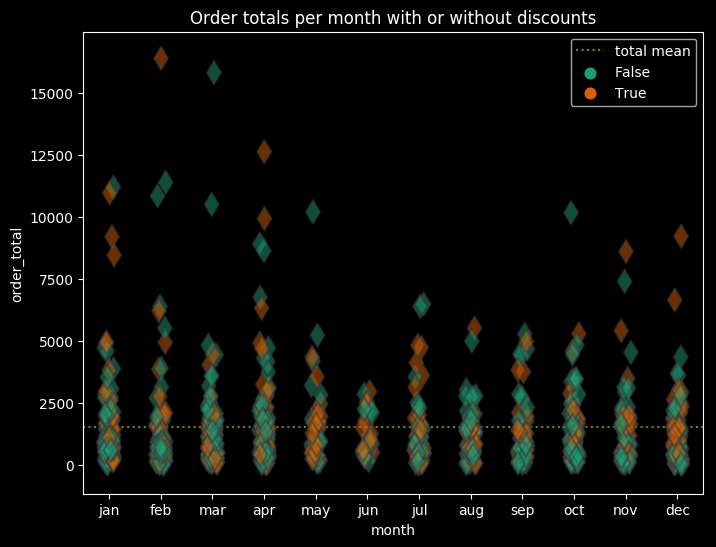

In [31]:
make_stripplot(x,y,title,hue,ticks)

## ***Aim 2 : Run final workflow for testing assumptions***

---



---




* ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
    1. **Test for Normality**<br>
        - [Normaltest/ D’Agostino and Pearson’s](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```
    2. **Test for Homogeneity of Variance**<br>
        - [Levene's Test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html)<br>         ```scipy.stats.levene```
    3. **Choose appropriate test based upon 1. and 2.** 
        - [Mann Whitney U Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)<br>  - non parametric equivalent of ANOVA)<br>
    ```stats.mannwhitneyu```<br>
        - Normal: 2 sample t-test
        - Welch's t-test (Jeff)
        
    4.  Calculate effect size, post-hoc tukeys tests.
        - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
          
* ***Aim 3: To perform post-hoc pairwise comparisons for level of discount***      
 
     
    6. If significant result, follow up with post-hoc tests
        - [Tukey's] https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
        ```statsmodels.stats.multicomp.pairwise_tukeyhsd```


### Aim 2.1: Test for Normality

#### Histograms month vs all months

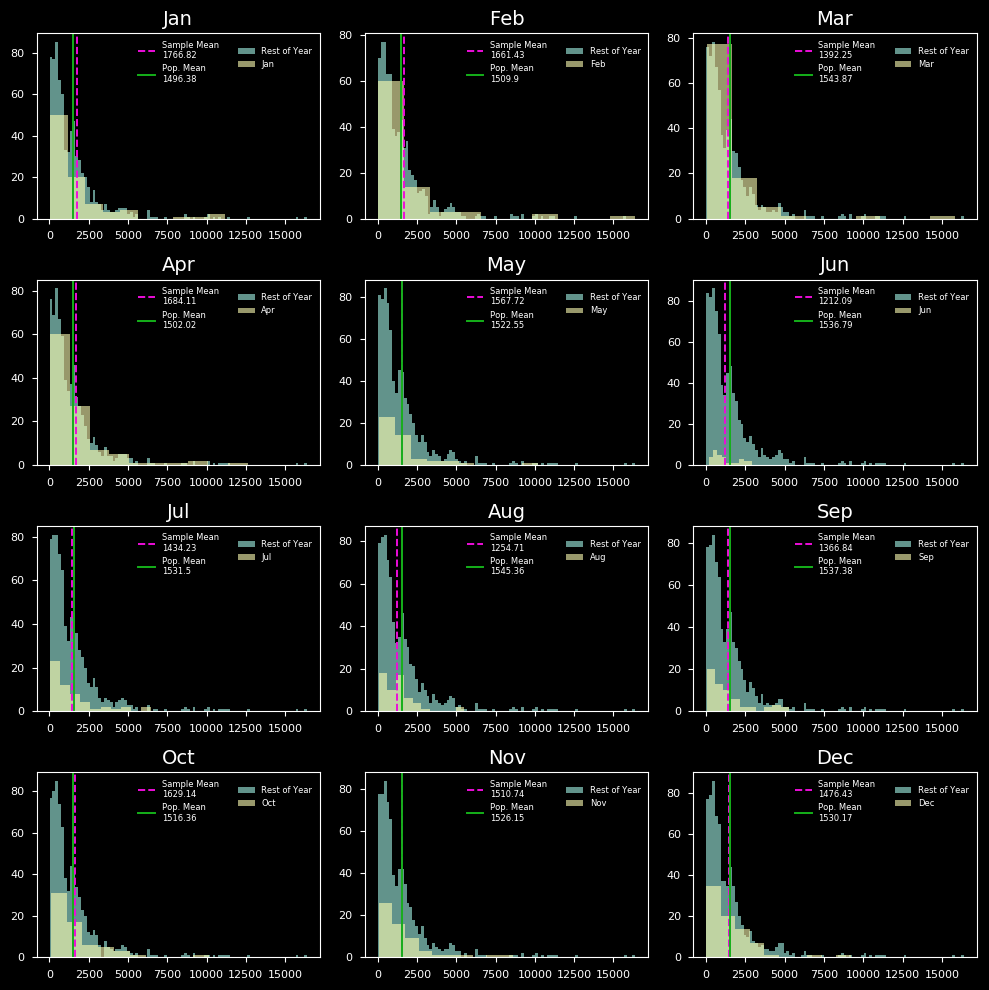

In [33]:
draw_histograms(df_year, 'month', month_dict, 4, 3)

In [0]:
# create a dict to test stats
dict_to_test ={}
for month in list(df_year['month_name'].unique()):
    dict_to_test[month] = df_year.groupby('month_name').get_group(month)

####Test for Normality

In [0]:
H3_tests = [['Group:','TestName','Test Purpose','stat','p', 'p < .05'] ]

In [0]:
from scipy.stats import normaltest

for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]

    #1. Test for normality
    test_purpose = 'Normality'
    test_to_run = 'normaltest'

    arrA = np.array(arrA)
    

    statA, pA = eval(test_to_run)(arrA)
    print(f'{month}:' statA, pA)
    H3_tests.append([month, test_to_run, test_purpose ,statA, pA, pA < .05])
    
arrB = np.array(df_year['order_total'])
stat, p = eval(test_to_run)(arrB)
H3_tests.append(['Total Pop', test_to_run, test_purpose,stat,p, p < .05])

### Aim 2.2 Test Homogneity of variance

####Levenes Test

In [0]:
from scipy.stats import levene

for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]
    arrB = df_year['order_total']

    test_to_run = 'levene'
    test_purpose = 'Equal Variance'

    arrA = np.array(arrA)
    arrB = np.array(arrB)

    stat, p = eval(test_to_run)(arrA,arrB,center='median')
    
    print(f'{month}:' stat,p)
    H3_tests.append([f'{month} & pop', test_to_run, test_purpose ,stat, p, p < .05])





stat,p = eval(test_to_run)(arrA,arrB,center='median')

H3_tests.append(['A&B',test_to_run,'Equal Var',stat,p, p < .05])

### Aim 2.3 T-Test
- Resample to compare results 
- Mann-Whitney U  because it is nonparametric

#### Resampling

In [0]:
months = {v:df_year.loc[df_year['month']==k]['order_total'] for k,v in month_dict.items()}
totals = df_year['order_total']

n = 50 
i = 10000
pop_samp_month_dict = {}
pop_samp_order_total = []


for i in range(0,i):
  
  pop_samp_order_total.append(totals.sample(n=30).mean())
  
for k,v in months.items():
  pop_samp_month_dict[k] = []
  for i in range(0,i):
      
    pop_samp_month_dict[k].append(round(v.sample(n=30).mean(),2))
    
pop_samp_month_dict = {k:np.random.choice(pop_samp_month_dict[k],1000) for k,
                       v in pop_samp_month_dict.items()}
pop_samp_order_total = np.random.choice(pop_samp_order_total, 1000)

##### Historgrams of resamples

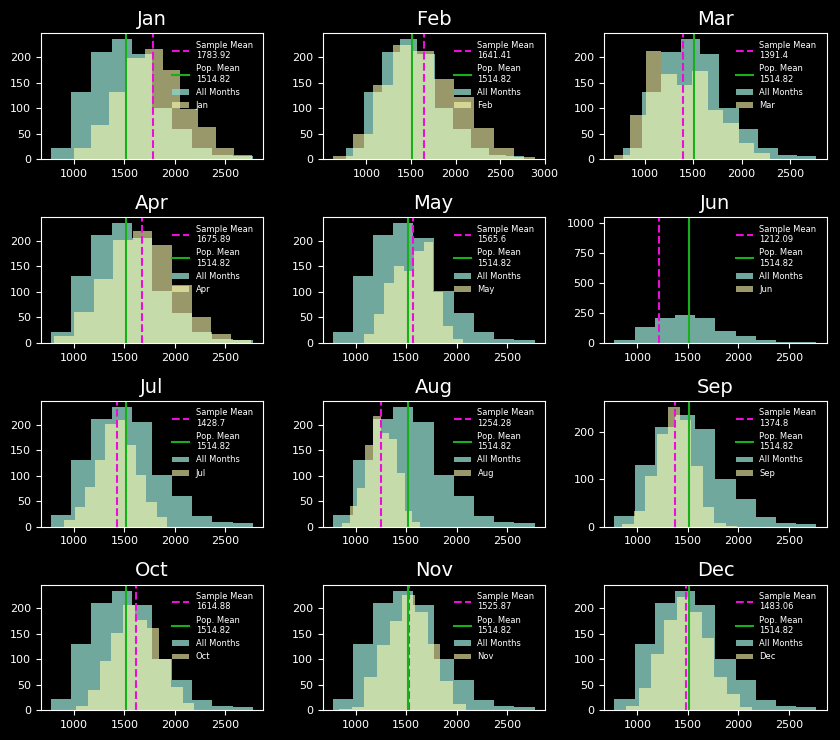

In [52]:
draw_histograms_from_sample(pop_samp_order_total, pop_samp_month_dict, 4,3)

##### Re-test homogeneity

In [49]:

arrA = [pop_samp_month_dict[k] for k,v in pop_samp_month_dict.items()]
arrB = pop_samp_order_total
test_to_run = 'levene'
test_purpose = 'Equal Variance'

stat,p = eval(test_to_run)(arrA[0],arrA[1],arrA[2],arrA[3],arrA[4],arrA[5]
                           ,arrA[6],arrA[7],arrA[8],arrA[9],arrA[10],
                           arrA[11],arrB,center='mean')

# H3_tests.append(['A&B Resampled',test_to_run,'Equal Var',stat,p])
print(stat, p)

308.35283529132056 0.0


#####T- Test resampled populations 

In [41]:
from scipy.stats import ttest_ind

for k, v  in pop_samp_month_dict.items(): 

  arrA = pop_samp_month_dict[k]
  arrB = pop_samp_order_total

  test_to_run = 'ttest_ind'
  test_purpose = 'H1 signifigance'


  stat,p = eval(test_to_run)(arrA,arrB,equal_var=False)

  print(f'{k}:',stat, p)

  H3_tests.append([f'{k} & pop', test_to_run, test_purpose ,stat, p, p < .05])





jan: 18.774020444762186 1.5641411485065607e-72
feb: 10.65756904870432 7.955065021277903e-26
mar: -7.550196656642076 6.588472648213872e-14
apr: 10.902235519205004 6.339856675240126e-27
may: 4.897138757427711 1.0694715928266611e-06
jun: -27.226220109782666 1.5209175397537036e-122
jul: -6.114427914510814 1.2242749018376897e-09
aug: -21.642822586971043 2.9036373201508872e-89
sep: -11.739432121504581 1.8113924867031588e-30
oct: 10.776759200717745 3.005072060544989e-26
nov: 0.6635765743087698 0.507054113661187
dec: -2.2474273584327333 0.024741409047352652


## Conclusions so far...
- We failed both normaltests and homo variance
the results for resampling do not seem reliable because they are being compared against them selfs
- Will try non-parametric 2sample ttest
    - [**Mann-Whitney U test**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
  - Most likey the tukeys test will be the best test for signifigance of these samples

####Whitney-Mann U test
- non parametric test 

In [42]:
from scipy.stats import mannwhitneyu

for month, df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]
    arrB = df_year['order_total']

    test_to_run = 'mannwhitneyu'
    test_purpose = 'Hi sig.'

    arrA = np.array(arrA).reshape(-1,1)
    arrB = np.array(arrB).reshape(-1,1)

    stat, p = eval(test_to_run)(arrA,arrB,alternative='two-sided')
    
    print(f'{month}:',stat, p)
    
    H3_tests.append([f'{month}', test_to_run, test_purpose ,stat, p, p < .05]) 

jul: 22169.5 0.7212599766032516
aug: 23658.5 0.8277135151606767
sep: 24066.5 0.6648739304857842
oct: 28409.0 0.35305089693057
nov: 24699.5 0.9105927574947236
dec: 33818.5 0.6431833031647948
jan: 39094.0 0.2765420112740373
feb: 32504.5 0.397040778774961
mar: 40223.5 0.3284153440773995
apr: 43578.0 0.9992349333133655
may: 19592.0 0.7640070387172484
jun: 12636.5 0.88932673899123


###Aim 2.4 Test effect size
 - use cohens d

In [43]:
d_dict = {}
for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]
    arrB = df_year[df_year['month_name']!= month]['order_total']

    test_to_run = 'Cohen_d'
    test_purpose = 'efect Size'

    arrA = np.array(arrA)
    arrB = np.array(arrB)

    d = Cohen_d(arrA, arrB)
    
    d_dict[month] = d
    
    print(f'{month}:',d)
    H3_tests.append([f'{month}', test_to_run, test_purpose ,stat])

jul: -0.052749530713908026
aug: -0.15774473701015873
sep: -0.09250458218541906
oct: 0.061168973116125624
nov: -0.008353033432259563
dec: -0.029140629162365816
jan: 0.1468047736499956
feb: 0.08219900692412836
mar: -0.08225129122081062
apr: 0.09879971312517516
may: 0.024493555997597418
jun: -0.17617034499076667


In [44]:
list2df(H3_tests)

,Group:,TestName,Test Purpose,stat,p
0,jul,normaltest,Normality,[28.482051126185347],[6.534331770226038e-07]
1,aug,normaltest,Normality,[35.4162984483613],[2.0391468707471406e-08]
2,sep,normaltest,Normality,[20.54630169179557],[3.454834723154762e-05]
3,oct,normaltest,Normality,[55.13143348111063],[1.067483890748691e-12]
4,nov,normaltest,Normality,[47.558320737323626],[4.7080586849956407e-11]
5,dec,normaltest,Normality,[65.10205167458949],[7.299096385000296e-15]
6,jan,normaltest,Normality,[71.68838581919523],[2.710596112209101e-16]
7,feb,normaltest,Normality,[91.35156962415954],[1.4563263232896427e-20]
8,mar,normaltest,Normality,[139.72199290480154],[4.568301306359054e-31]
9,apr,normaltest,Normality,[81.80660342704186],[1.721558457237129e-18]


#### Calculating Effect Size

In [45]:
# Calculating Cohens d
d = Cohen_d(arrA,arrB)
print(f"Cohen's d={round(d,3)}")

Cohen's d=-0.176


## ***Aim 3: Compare between all Months***

###Tukey's Test


In [0]:
# Importing tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey

int_str = [str(x) for x in df_year['month_name']]# create labels

In [47]:
#run tukeys test
tukey_results =tukey(df_year['order_total'], int_str, 0.05)
print(tukey_results.summary())

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower      upper   reject
---------------------------------------------------
 apr    aug   -429.4049 -1421.7047  562.895  False 
 apr    dec   -207.6797 -1111.0347  695.6754 False 
 apr    feb    -22.678  -913.5247   868.1687 False 
 apr    jan    82.7094  -793.8885   959.3073 False 
 apr    jul   -249.8789 -1259.4613  759.7034 False 
 apr    jun   -472.0174 -1727.6696  783.6348 False 
 apr    mar   -291.8645 -1133.0197  549.2908 False 
 apr    may   -116.3951 -1188.8343  956.044  False 
 apr    nov   -173.3675 -1160.2354  813.5004 False 
 apr    oct    -54.971  -1016.8412  906.8993 False 
 apr    sep   -317.2668 -1298.8553  664.3217 False 
 aug    dec    221.7252 -827.0696  1270.5199 False 
 aug    feb    406.7269 -631.3136  1444.7673 False 
 aug    jan    512.1143 -513.7239  1537.9525 False 
 aug    jul    179.5259 -962.0417  1321.0935 False 
 aug    jun    -42.6125 -1406.6443 1321.4192 False 
 aug    mar 

In [48]:
# Save the results into a dataframe
dfH_tukey = pd.DataFrame(data=tukey_results._results_table.data[1:],
                         columns=tukey_results._results_table.data[0])

# checking for any signifigance
dfH_tukey.loc[dfH_tukey['reject']==True]

,group1,group2,meandiff,lower,upper,reject


## ***Conclusions for Hypothesis 3:***
1. **We first used D'Agostino & Perason's test (normaltest) to check for normal distributions**
    -  Both groups had p-values very far below our $\alpha=0.05$  (Rows 0,1 below)
        - We rejecteded the null hypothesis that the groups came from a populatiin with a normal distribtuion. 
2. **We tested for equal variances using Levene's test. **
    - Level's test had a signifcant p-value, so we rejected the hypothesis that the groups have equal variances
    
3. **We then concluded we need a non-parametric 2-sample test, so we used the Mann-Whitney U test**. 
    -  Our comparison had a p-value less than .05
    - We reject the null hypothesis that discounts do not affect quantities sold.

